# Import Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
Black_Friday = pd.read_csv('BlackFriday.csv')

In [3]:
Black_Friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Data Preprocessing
1. Transfer string type attribute to numerical data
2. Group by customers
3. normalize purchase amount and size

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Black_Friday['Gender'] = le.fit_transform(Black_Friday['Gender'])

le = preprocessing.LabelEncoder()
Black_Friday['Age'] = le.fit_transform(Black_Friday['Age'])

le = preprocessing.LabelEncoder()
Black_Friday['Stay_In_Current_City_Years'] = le.fit_transform(Black_Friday['Stay_In_Current_City_Years'])


In [6]:
MEAN = Black_Friday.groupby('User_ID').mean()
numerical_data = MEAN.iloc[:,[0,1,2,3,4]]
numerical_data['Purchase'] = Black_Friday.groupby('User_ID').sum()['Purchase']
numerical_data['Size'] = Black_Friday.groupby('User_ID').size()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mm_P = MinMaxScaler()
mm_data_P = mm_P.fit_transform(pd.DataFrame(numerical_data['Purchase']))
origin_data_P = mm_P.inverse_transform(mm_data_P)
numerical_data['Purchase']=mm_data_P

mm_S = MinMaxScaler()
mm_data_S = mm_S.fit_transform(pd.DataFrame(numerical_data['Size']))
origin_data_S = mm_S.inverse_transform(mm_data_S)
numerical_data['Size']=mm_data_S

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

# K-means Cluster

- we set k=4
- clustering the customer in terms of purchase amount and basket size

In [8]:
from sklearn.cluster import KMeans

In [9]:
from sklearn import mixture

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(numerical_data[['Purchase','Size']])
type_ = kmeans.predict(numerical_data[['Purchase','Size']])

In [11]:
numerical_data['type']=np.array(type_)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


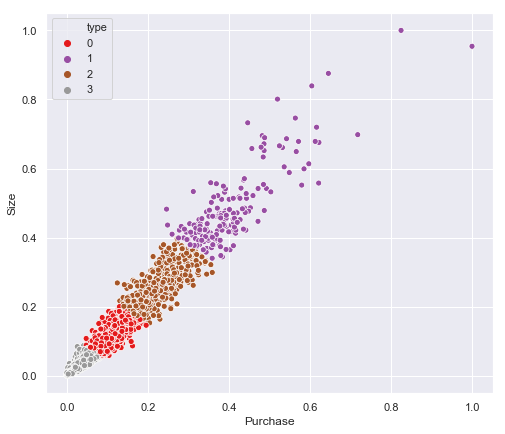

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.subplots(figsize=(8, 7))
ax = sns.scatterplot(x='Purchase', y='Size',palette="Set1",
                   hue='type',data=numerical_data)
plt.show()

# Use the cluster label as y to build classifier

In [15]:
df_class=numerical_data[['Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','type']]

In [16]:
df_1 = Black_Friday.groupby(['User_ID','Product_Category_1']).count()
costomers=list(df_1.index.levels[0])
label_records=[]
for i in costomers:
    label_records.append((list(df_1.loc[i].sort_values('Age',ascending=False).index)[:3]))
fav=pd.DataFrame(label_records).fillna(0)

In [17]:
df_class['favcat_1']=np.array(fav[0])
df_class['favcat_2']=np.array(fav[1])
df_class['favcat_3']=np.array(fav[2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_class, test_size = 0.2)
x_train = train[['Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','favcat_1','favcat_2','favcat_3']]
y_train = train[['type']]
x_test = test[['Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','favcat_1','favcat_2','favcat_3']]
y_test = test[['type']]

# Use decision tree to predict labels

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
import sklearn
p_train=model.predict(x_train)
p_test = model.predict(x_test)

In [21]:
sklearn.metrics.accuracy_score(y_train, p_train)

0.891553480475382

In [22]:
sklearn.metrics.accuracy_score(y_test, p_test)

0.48854961832061067

In [79]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df_class if not key == 'type']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.53719 to fit



# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
p_train=model.predict(x_train)
p_test = model.predict(x_test)
sklearn.metrics.accuracy_score(y_train, p_train)

0.8792444821731749

In [27]:
sklearn.metrics.accuracy_score(y_test, p_test)

0.5436810856658185

In [14]:
# import seaborn as sns
# sns.set(style="ticks")
# sns.pairplot(df_class, hue="type")

# SVM

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(np.array(x_train), np.array(y_train))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
svclassifier.score(x_train,y_train)

0.6455857385398981

In [30]:
svclassifier.score(x_test,y_test)

0.6344359626802375